# **Proyecto 03 - Series de Tiempo**

**Dataset: Flujo Vehicular por Unidades de Peaje AUSA**

## *Business Understanding*

Personas se trasladan por trabajo o trabajando, para hacer trámites, están en viaje de vacaciones, por estudio, para visitar amigos o familia, hacer compras, ocio, y demás. Un completo universo de individuos se traslada. Este interminable e intermitente movimiento, creciente con el tiempo (me aventuro), define una característica de la modernidad. Somos cambientes y flexibles. No dormimos dónde trabajamos. No descansamos dónde vivimos. No trabajamos en un sólo lugar, ni acumulamos parientes o amistades en zonas geográficas. Las oportunidades (y la vida) están donde estan, y vamos tras ellas. 

Este sostenido incremento en la movilidad puede generar congestión. Que calles chicas requieran ser avenidas. Que avenidas acaben insuficientes, y requiramos autopistas. Todo ello, para no perecer en interminables y agotadores traslados, desde, o hacia. La demora del traslado es una de las variables que más afecta a la calidad de vida en las grandes urbes.

Nos movemos. Pero no todos por igual. Hay patrones, algunos bastante obvios. A primera hora, hacia nuestros trabajos, principalmente. Al final de la tarde, el regreso. Los fines de semana, o en temporada de verano e invierno, por ocio. Tambien viajamos por trámites, para ver profesionales de la salud, especialistas, etc. 

Cambia el costo del peaje, del estacionamiento, de la patente, de la VTV, y/o del combustible. Algunos deciden carpolling, otros deciden no subir a la autopista, o sólo para ir o volver. A veces pagamos en efectivo. Nos modernizamos y usamos abonos. Se crea nueva infraestructura (PDB). Se crean o destruyen días feriados. Equipos de fúltbol disputan partidos internacionales, o no entran en las copas (o no hay eliminatorias para seleccionados nacionales). No viajamos (o sí) si hay votación. 

## Estudios de análisis de variables que impactan en el uso de autopistas

- cuestiones climáticas

# **Análisis Exploratorio de Datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import datetime
sns.set()

from fbprophet import Prophet

In [2]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12, ha = 'center', xycoords = 'data') 
    

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha ='center' , xycoords = 'data')

In [3]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

## *Explorando los datasets*

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


**Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:**

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

## Acondicionando el dataset

Vamos a concatenar los años, filtrar por la autopista Illia, pasar la fecha a datetime, y unificarla con hora_fin. De esta forma, nos podemos deshacer de los atributos 'período', 'hora_inicio' y 'hora_fin'. De todas formas, de momento conservaremos esta última, así como todas las formas de pago. 

Si bien el objeto del proyecto es predecir volumen de tráfico para la autopista Illia con pago en efectivo, haremos el analisis exploratorio sobre la totalidad de categorias de los atributos (excepto estación), que servirá de base para responder una mayor cantidad de interrogantes, que podremos a posteriori plasmar en otros modelos de machine learning.

In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2017, data_2018, data_2019])

#Nos quedamos solamente con la estación Illia; de momento dejamos todas las formas de pago Efectivo para realizar el AED
mask = dataset.estacion=='Illia'
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.tail(5)

,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
812133,0,Martes,Illia,Centro,Liviano,TELEPASE,39,2019-12-31
812134,0,Martes,Illia,Centro,Pesado,TELEPASE,2,2019-12-31
812135,0,Martes,Illia,Provincia,Liviano,NO COBRADO,145,2019-12-31
812136,0,Martes,Illia,Provincia,Liviano,TELEPASE,26,2019-12-31
812137,0,Martes,Illia,Provincia,Pesado,NO COBRADO,2,2019-12-31


In [12]:
dataset.shape

(752552, 8)

El dataset contiene ahora 752552 registros. Vamos a mirar missing values.

In [13]:
dataset.isnull().sum()

hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64

El dataset no tiene datos faltantes

## Una mirada a la serie completa

Vamos a comenzar por descripción básica. Hacemos una vista cenital de la ventana de tiempo completa, **resampleado en días**, del total de tráfico.

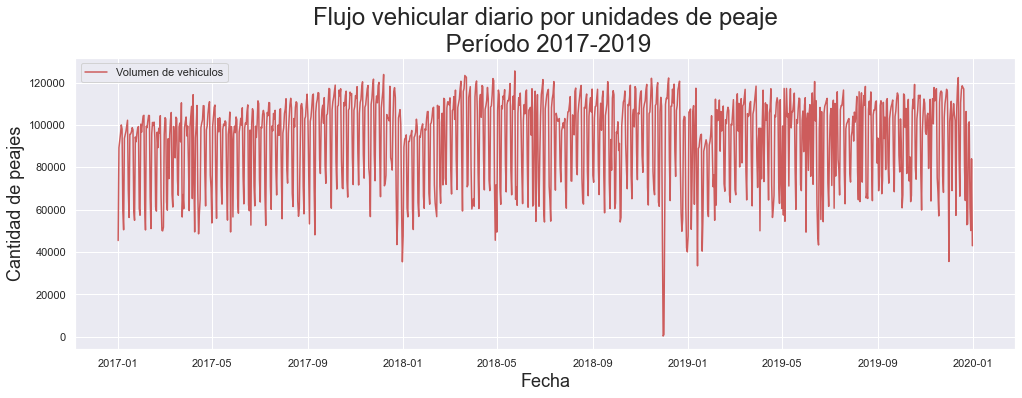

In [14]:
diario_ambos_sentidos = dataset.resample('D', on = 'fecha').sum()
plt.figure(figsize = (15,5))
plt.plot(diario_ambos_sentidos.index, diario_ambos_sentidos.cantidad_pasos, label = 'Volumen de vehiculos', color='indianred')
plt.title('Flujo vehicular diario por unidades de peaje\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
plt.legend()
plt.show()

La estacionalidad diaria nos dificulta la visualización. Lo **resampleo a semanal**.

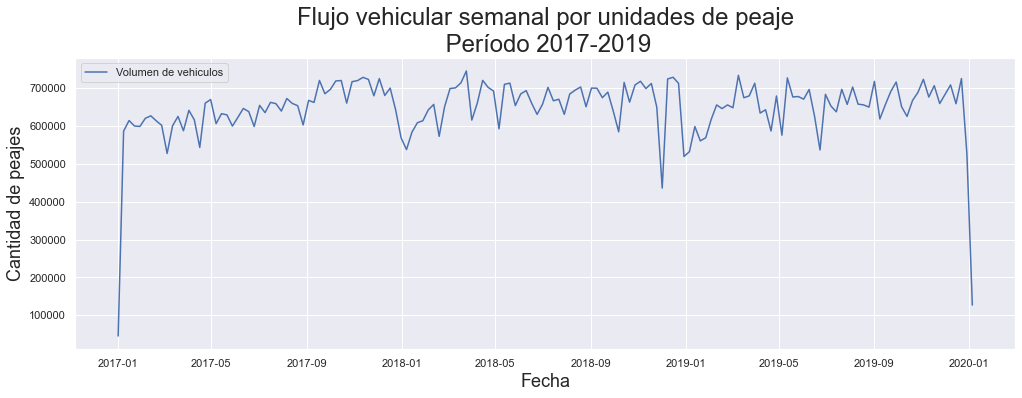

In [15]:
semanal = dataset.resample('W', on = 'fecha').sum()
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Volumen de vehiculos')
plt.title('Flujo vehicular semanal por unidades de peaje\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
plt.legend()
plt.show()

La primera y última semana contienen uno (Domingo), y dos días (Lunes y Martes). A eso se debe fundamentalmente que sean de tan bajo 'cantidad_pases'. 

Como es de esperar, se observa una caída brusca en el flujo vehícular en el início de cada año. Luego lo analizaremos más detenidamente. Por otra parte, el año 2017 parece mostrar un crecimiento sostenido durante todo el año, mientras que 2018 y 2019 parecen con tendencia estacionaria en la media, pero con valores mucho más volátiles.

In [16]:
dataset.head()

,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
1749,1,Domingo,Illia,Centro,Liviano,NO COBRADO,252,2017-01-01 01:00:00
1750,1,Domingo,Illia,Centro,Liviano,EFECTIVO,1,2017-01-01 01:00:00
1751,1,Domingo,Illia,Centro,Liviano,TELEPASE,100,2017-01-01 01:00:00
1752,1,Domingo,Illia,Centro,Pesado,TELEPASE,2,2017-01-01 01:00:00
1753,1,Domingo,Illia,Centro,Pesado,TELEPASE,1,2017-01-01 01:00:00


## Los días de mayor flujo vehicular

In [17]:
by_weekday = dataset.groupby(['dia'], sort=False)['cantidad_pasos'].mean()
by_weekday


dia
Domingo      111.523175
Lunes        137.127186
Martes       142.272521
Miércoles    144.229845
Jueves       147.991463
Viernes      145.801561
Sábado       116.210796
Name: cantidad_pasos, dtype: float64

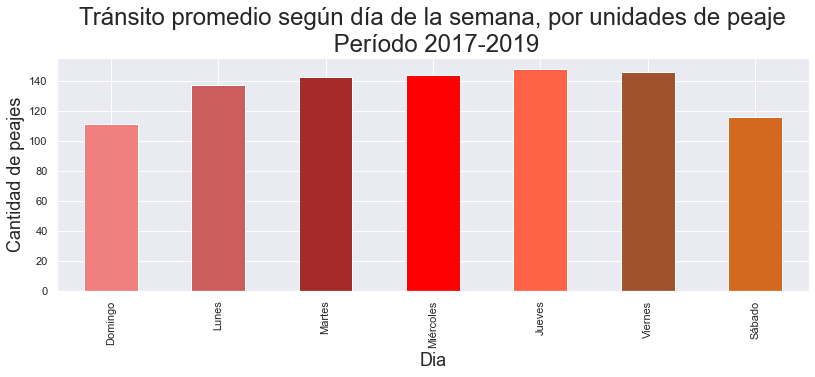

In [18]:
#by_weekday.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.figure(figsize = (12,4))
by_weekday.plot.bar(color=['lightcoral', 'indianred', 'brown', 'red', 'tomato', 'sienna', 'chocolate'], edgecolor='w')
plt.title('Tránsito promedio según día de la semana, por unidades de peaje\n Período 2017-2019', fontsize=24)
plt.xlabel('Dia', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
#plt.legend()
plt.show()

In [19]:
by_hour = dataset.groupby(['hora_fin'], sort=False)['cantidad_pasos'].mean()
by_hour

hora_fin
1      59.938783
2      43.962589
3      31.131580
4      23.836592
5      26.643496
6      45.276955
7      96.086801
8     166.302129
9     189.532302
10    171.487814
11    161.655513
12    159.622334
13    167.867854
14    171.231025
15    165.796938
16    173.023645
17    184.863625
18    203.516598
19    212.470007
20    184.744806
21    159.648180
22    122.593656
23     90.215053
0      70.765261
Name: cantidad_pasos, dtype: float64

## Las horas de mayor flujo vehicular

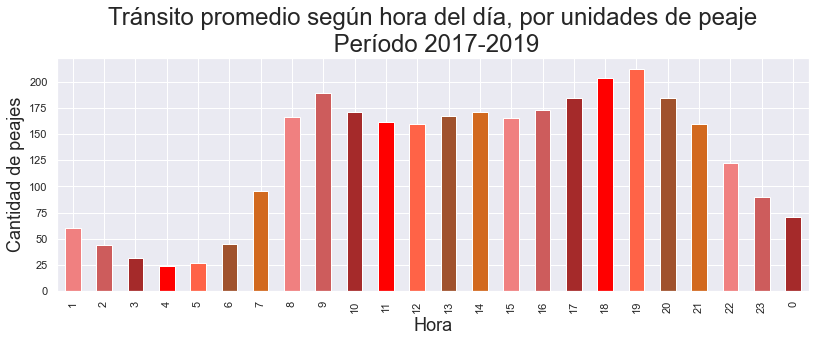

In [20]:
plt.figure(figsize = (12,4))
by_hour.plot.bar(color=['lightcoral', 'indianred', 'brown', 'red', 'tomato', 'sienna', 'chocolate'], edgecolor='w')
plt.title('Tránsito promedio según hora del día, por unidades de peaje\n Período 2017-2019', fontsize=24)
plt.xlabel('Hora', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
#plt.legend()
plt.show()

## Análisis por sentido de circulación

**Vamos a hacer el mismo análisis, pero desagregando sentido centro y provincia. Cabe la siguiente pregunta: ¿se iguala diariamente el flujo vehicular entre ambos sentidos?**

In [21]:
#máscara x sentido
sentido_Centro = dataset[(dataset['sentido']=='Centro')]
sentido_Provincia = dataset[(dataset['sentido']=='Provincia')]

#Resampleamos a día
diario_Centro = sentido_Centro.resample('D', on = 'fecha').sum()
diario_Provincia = sentido_Provincia.resample('D', on = 'fecha').sum()

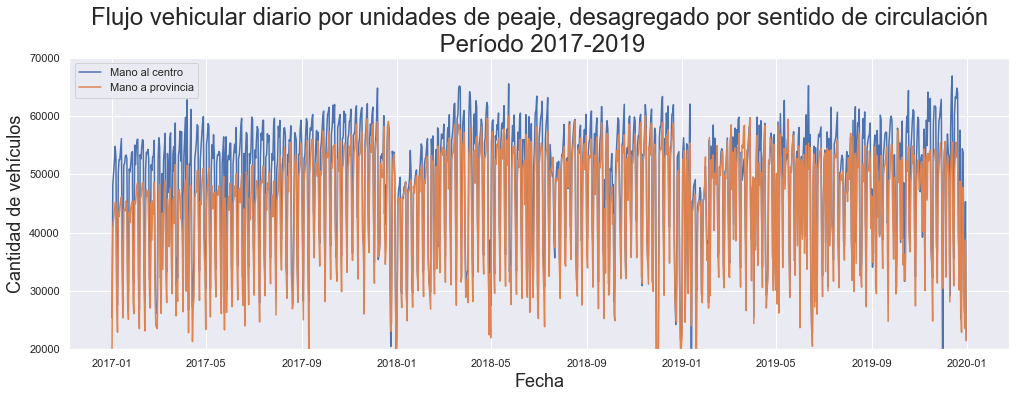

In [22]:
plt.figure(figsize = (15,5))
plt.plot(diario_Centro.index, diario_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(diario_Provincia.index, diario_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('Flujo vehicular diario por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
plt.ylim(20000,70000)
plt.legend()
plt.show()

Entonces, ¿se iguala el volumen de vehículos que recorren la autopista diariamente en sentido centro y provincia? No parece ser el caso, sobre todo el primer año de análisis. Siempre (o casi) el flujo vehicular mano al centro es superior al flujo mano a provincia. Vamos a representar gráficamente la diferencia neta entre ambos sentidos de circulación, para observar más nítidamente.

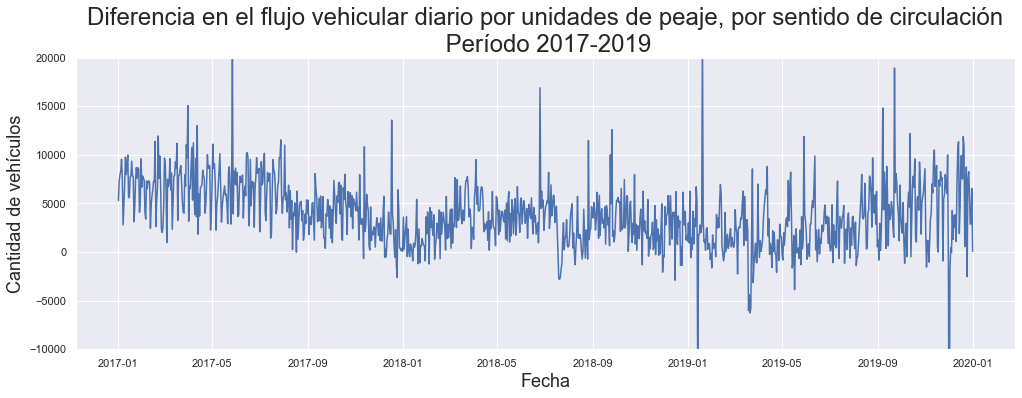

In [23]:
diferencia_diaria = diario_Centro-diario_Provincia

plt.figure(figsize = (15,5))
plt.plot(diferencia_diaria.index, diferencia_diaria.cantidad_pasos)
#plt.plot(diario_Provincia.index, diario_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('Diferencia en el flujo vehicular diario por unidades de peaje, por sentido de circulación\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
plt.ylim(-10000,20000)
#plt.legend()
plt.show()

Esta es la diferencia neta entre mano centro y provincia. Comprobamos lo anterior. Pero esa brecha no parece estable, lineal, sino más bien una parábola. Vamos a resamplear a mensual.

In [24]:
#Resampleamos a mes
mensual_Centro = sentido_Centro.resample('M', on = 'fecha').sum()
mensual_Provincia = sentido_Provincia.resample('M', on = 'fecha').sum()

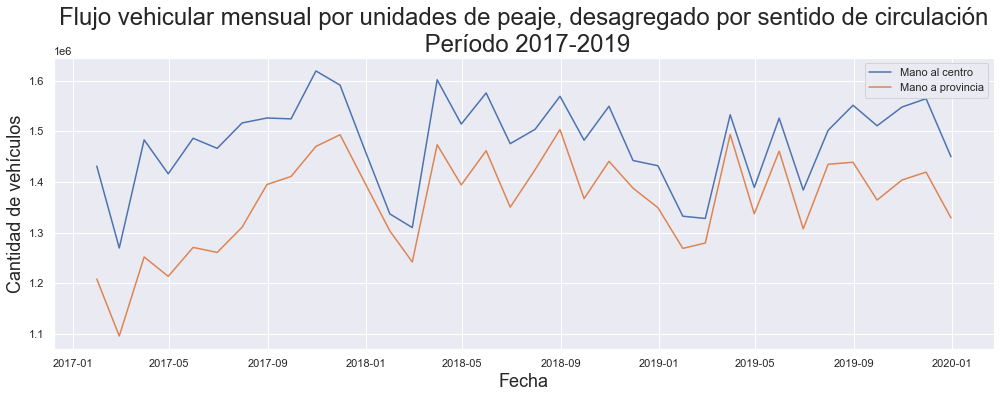

In [25]:
plt.figure(figsize = (15,5))
plt.plot(mensual_Centro.index, mensual_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(mensual_Provincia.index, mensual_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('Flujo vehicular mensual por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

Vemos ambas series, resampleadas a mensual. En 2017 parece ir cerrandose conforme avanza el año. En 2018 se mantiene estable en los valores alcanzados el año anterior, y en 2019 parece cerrarse aún más en el primer semestre, pero luego vuelve a hacerse divergente. Si tuviese que intuir el motivo de esta brecha, diría que tiene que ver con el valor del tiempo (en términos microeconómicos, la "utilidad del tiempo"), y en cómo difiere éste. 

El tiempo es siempre el mismo, pero la valoración que hacemos de éste cambia. Por ejemplo, viajar en autopista al trabajo nos permite descansar más tiempo y acortar la duración del viaje. Este tiempo extra de ocio en la mañana es algo por lo que podríamos estar dispuestos a pagar, siempre dependiendo el costo del peaje. Pero no a la tarde. Ya con el día iniciado, el valor del tiempo es diferente, quizás menor, y no justifiquemos el costo del peaje por ahorrarnos unos minutos. 
Pero esta no es la única explicación. También es posible que el retorno a casa incluya realizar las compras en el camino, o realizar otras actividades, para las cuales no sea necesario tomar la autopista, o no lo justifique.

Creo que lo anterior justifica que realicemos un análisis de sensibilidad al cambio de precio del peaje (información que deberemos obtener).La hipótesis: "el viaje al trabajo" es un bien necesario, menos elástico, mientras que la vuelta (siempre asumiendo que en Capital se trabaja mientras que en sentido a provincia se vive), es un bien normal o de lujo. Usar un camino alternativo a la autopista insume naturalmente más tiempo. Pero ese tiempo es más valioso a la mañana, que para la hora del regreso. 

Vamos a graficar la diferencia neta mensual, y tratar de aproximar la brecha con una media movil, para ver si confirmamos el movimiento descrito en el primer párrafo.

In [26]:
diferencia_mensual = mensual_Centro-mensual_Provincia

ventana = 8
diferencia_mensual_promedio = diferencia_mensual.cantidad_pasos.rolling(window=ventana, center = True).mean()
diferencia_mensual_promedio

fecha
2017-01-31           NaN
2017-02-28           NaN
2017-03-31           NaN
2017-04-30           NaN
2017-05-31    198802.500
2017-06-30    185137.625
2017-07-31    182021.625
2017-08-31    165353.000
2017-09-30    148090.875
2017-10-31    125331.125
2017-11-30    108104.000
2017-12-31     98392.375
2018-01-31     96999.875
2018-02-28     97038.000
2018-03-31     94084.125
2018-04-30     91798.750
2018-05-31     91937.125
2018-06-30    102163.250
2018-07-31    107266.625
2018-08-31     98052.375
2018-09-30     93380.875
2018-10-31     87072.125
2018-11-30     77453.250
2018-12-31     72329.000
2019-01-31     70629.125
2019-02-28     64349.875
2019-03-31     60328.125
2019-04-30     61896.125
2019-05-31     65603.625
2019-06-30     76009.000
2019-07-31     87974.750
2019-08-31    101273.000
2019-09-30    109885.125
2019-10-31           NaN
2019-11-30           NaN
2019-12-31           NaN
Freq: M, Name: cantidad_pasos, dtype: float64

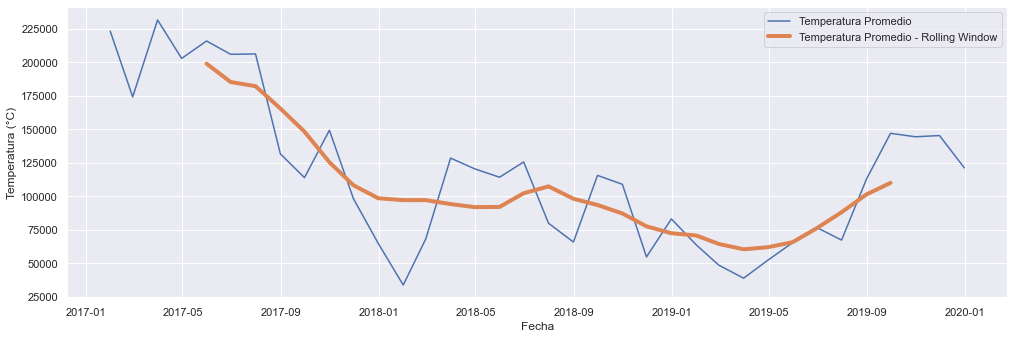

In [27]:
plt.figure(figsize = (15,5))
plt.plot(diferencia_mensual.index, diferencia_mensual.cantidad_pasos, label = 'Temperatura Promedio')
plt.plot(diferencia_mensual_promedio, lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Se observa la parábola. Vamos a tener que buscar datos externos para entender este movimiento. 

## Formas de pago

El trabajo es con medio de pago en efectivo, sin embargo, vamos a analizar a todos ellos. Primero, analizemos su distribución.

In [28]:
dataset['forma_pago'].value_counts()

EFECTIVO                238869
TELEPASE                204612
EXENTO                  105903
INFRACCION               78000
NO COBRADO               66679
TARJETA DISCAPACIDAD     41336
T. DISCAPACIDAD          17139
MONEDERO                    14
Name: forma_pago, dtype: int64

In [29]:
#Vamos a unir tarjeta de discapacidad ya que se trata de un cambio de denominación
dataset.replace('TARJETA DISCAPACIDAD', 'T. DISCAPACIDAD', inplace=True)

In [30]:
dataset['forma_pago'].value_counts()

EFECTIVO           238869
TELEPASE           204612
EXENTO             105903
INFRACCION          78000
NO COBRADO          66679
T. DISCAPACIDAD     58475
MONEDERO               14
Name: forma_pago, dtype: int64

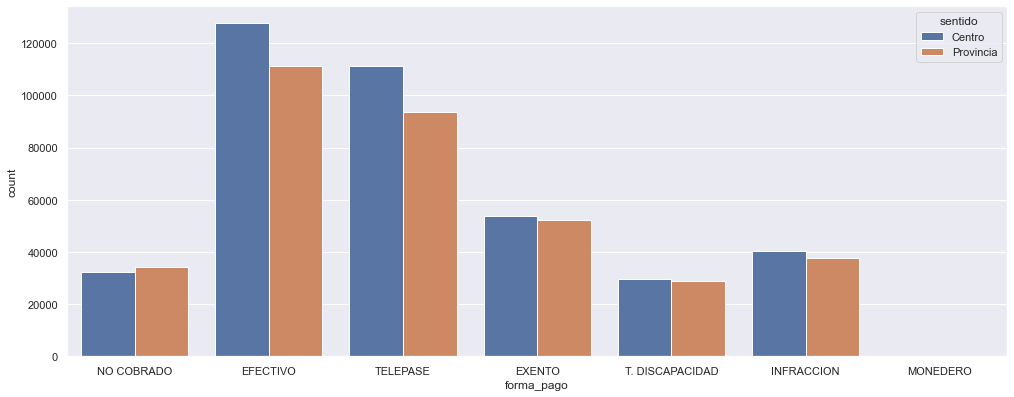

In [31]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data = dataset, x = 'forma_pago', hue= 'sentido') #
#with_hue(ax,dataset.forma_pago,7,2)

Se observa que hay poca diferencia entre sentido para los peajes que no representan erogación (no cobrado, exento, infracción y tarjeta discapacidad). Esto refuerza lo indicado antes: el uso de la autopista es resultado de la evaluación valor del tiempo/costo del peaje. Es decir, a bajo o nulo costo, el uso de la autopista se incrementaría, porque tiene valor para el usuario. 

Vamos a tratar de analizar la evolucipn de los tipos de pago

In [32]:
dataset_NO_COBRADO= dataset[(dataset['forma_pago']== 'NO COBRADO')]
dataset_NO_COBRADO = dataset_NO_COBRADO.resample('M', on = 'fecha').sum()
dataset_TELEPASE = dataset[(dataset['forma_pago']== 'TELEPASE')]
dataset_TELEPASE= dataset_TELEPASE.resample('M', on = 'fecha').sum()
dataset_EFECTIVO = dataset[(dataset['forma_pago']== 'EFECTIVO')]
dataset_EFECTIVO= dataset_EFECTIVO.resample('M', on = 'fecha').sum()
dataset_EXENTO = dataset[(dataset['forma_pago']== 'EXENTO')]
dataset_EXENTO= dataset_EXENTO.resample('M', on = 'fecha').sum()
dataset_INFRACCION = dataset[(dataset['forma_pago']== 'INFRACCION')]
dataset_INFRACCION= dataset_INFRACCION.resample('M', on = 'fecha').sum()
dataset_T_DISCAPACIDAD = dataset[(dataset['forma_pago']== 'T. DISCAPACIDAD')]
dataset_T_DISCAPACIDAD= dataset_T_DISCAPACIDAD.resample('M', on = 'fecha').sum()

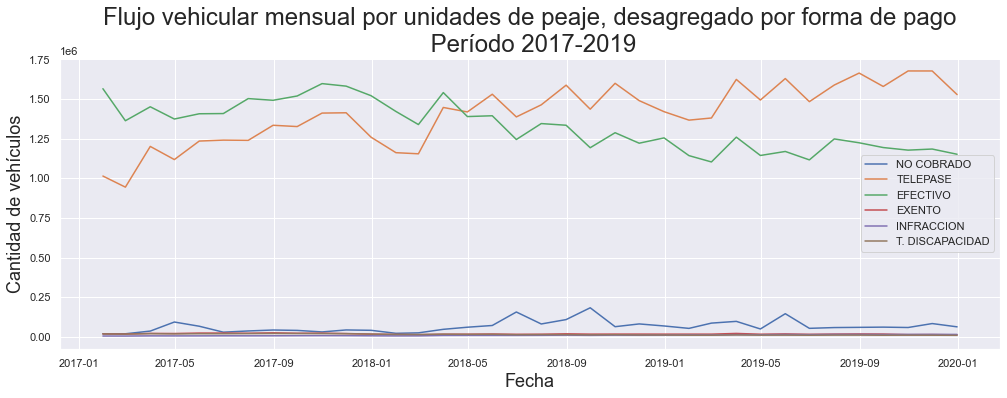

In [33]:
plt.figure(figsize = (15,5))
plt.plot(dataset_NO_COBRADO.index, dataset_NO_COBRADO.cantidad_pasos, label = 'NO COBRADO')
plt.plot(dataset_TELEPASE.index, dataset_TELEPASE.cantidad_pasos, label = 'TELEPASE')
plt.plot(dataset_EFECTIVO.index, dataset_EFECTIVO.cantidad_pasos, label = 'EFECTIVO')
plt.plot(dataset_EXENTO.index, dataset_EXENTO.cantidad_pasos, label = 'EXENTO')
plt.plot(dataset_INFRACCION.index, dataset_INFRACCION.cantidad_pasos, label = 'INFRACCION')
plt.plot(dataset_T_DISCAPACIDAD.index, dataset_T_DISCAPACIDAD.cantidad_pasos, label = 'T. DISCAPACIDAD')
#plt.xlim(datetime.date(2018,3,1), datetime.date(2018,6,1))
#plt.ylim(800000,2000000)
plt.title('Flujo vehicular mensual por unidades de peaje, desagregado por forma de pago\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.legend()
plt.show()

De cara el proyecto, observamos que **el pago en EFECTIVO decrece desde abril-mayo de 2018**, cerca del momento en que se intersecta con el pago mediante TELEPASE. Antes de eso parece bastante estable. En relación al **TELEPASE, se mantuvo creciente durante el total de la ventana de tiempo**. ¿Razones? El **29/03/2018 se registró un incremento cercano al 14% en el valor de los peajes**. Y el pago mediante TELEPASE ofrece un 15% de descuento sobre el valor en efectivo. Es posible que el aumento de precios acelerara la conversión en el medio de pago. 

Y este descenso del medio de pago EFECTIVO, ¿se explica por un cambio en el comportamiento de vehículos liviano, pesados, o de ambos?  

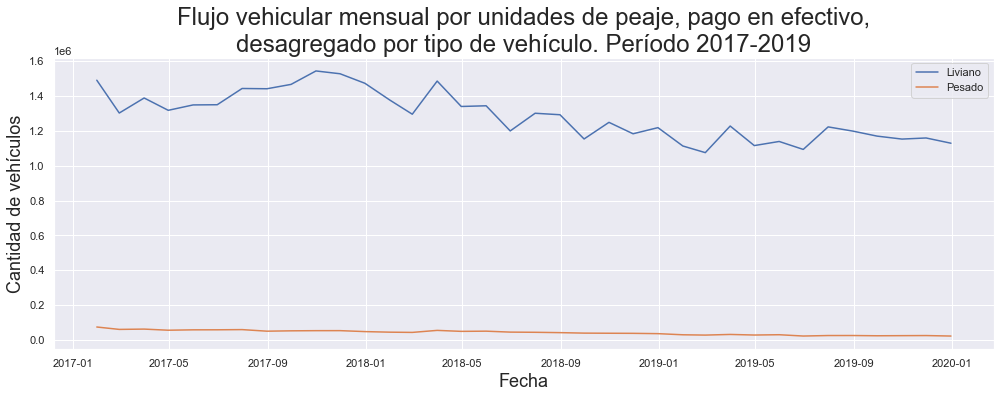

In [34]:
data_eftv=dataset[(dataset['forma_pago']== 'EFECTIVO')]
data_eftv_livianos= data_eftv[(data_eftv['tipo_vehiculo']== 'Liviano')].resample('M', on = 'fecha').sum()
data_eftv_pesados= data_eftv[(data_eftv['tipo_vehiculo']== 'Pesado')].resample('M', on = 'fecha').sum()

plt.figure(figsize = (15,5))
plt.plot(data_eftv_livianos.index, data_eftv_livianos.cantidad_pasos, label = 'Liviano')
plt.plot(data_eftv_pesados.index, data_eftv_pesados.cantidad_pasos, label = 'Pesado')
#plt.xlim(datetime.date(2018,3,1), datetime.date(2018,6,1))
#plt.ylim(800000,2000000)
plt.title('Flujo vehicular mensual por unidades de peaje, pago en efectivo,\ndesagregado por tipo de vehículo. Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.legend()
plt.show()


Vemos que al final de la ventana de tiempo, ambos tipos de vehículos han disminuido la cantidad de peajes abonados mediante efectivo. Sin embargo, y al margen del medio de pago, la participación de vehículos pesados es marginal. Esto nos lleva a la siguiente pregunta: ¿cómo se compone el flujo vehícular de la autopista? 

## Tipo de vehículo

In [35]:
#plt.figure(figsize=(15,6))
#ax=sns.countplot(data = dataset, x = 'tipo_vehiculo', hue= 'sentido') #
#with_hue(ax,dataset.forma_pago,7,2)

plt.bar(x='tipo_vehiculo', height='cantidad_pasos', data=dataset)

## Autocorrelación y Autocorrelación Parcial

El análisis de series temporales implica asumir que, en gran medida, el futuro se comportará como el pasado. De esta forma, podemos apoyarnos en datos del pasado para realizar pronósticos. Una forma de observar en que grado esto es cierto, es observando la autocorrelación, y la autocorrelación parcial. La autocorrelación, como se desprende del nombre, es la correlación de la serie consigo misma. En este caso, comparando los valores de una serie con los adoptados por la misma serie, pero en períodos anteriores. 

Vamos a tomar el dataset, de aquí en adelante, que ya posee filtrado por estación Illia y pago en efectivo. Vamos a resamplear a granularidad diaria.

In [36]:
data_illi_efctv_diario= data_eftv.resample('D', on = 'fecha').sum()
data_illi_efctv_diario

,hora_fin,cantidad_pasos
fecha,,
2017-01-01,2976,31183
2017-01-02,3713,51568
2017-01-03,3573,51093
2017-01-04,3909,53332
2017-01-05,3820,56486
...,...,...
2019-12-27,1104,40182
2019-12-28,1104,30681
2019-12-29,1104,26259


#importamos acf (autocorrelation function)
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

nlags =  6*10
autocorr = acf(data_illi_efctv_diario.cantidad_pasos, nlags = nlags)
pautocorr = pacf(data_illi_efctv_diario.cantidad_pasos, nlags = nlags)

plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

Vamos a graficar el correlograma con la función de statsmodels. 

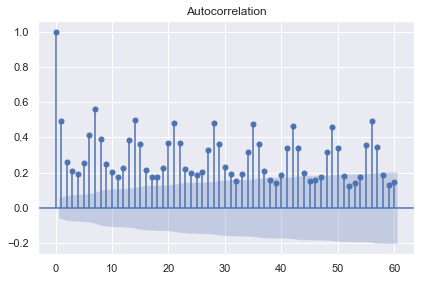

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
#plt.figure(figsize=(20,8))
plot_acf(data_illi_efctv_diario.cantidad_pasos, lags = 6*10)
plt.show()

El resultado es el esperado. La serie presenta estacionalidad semanal, advertido por su forma sinusoidal. Es decir, hay ciclos bien claros de una semana. Cada día de la semana tiene su correlato en el mismo día pero de las otras. 

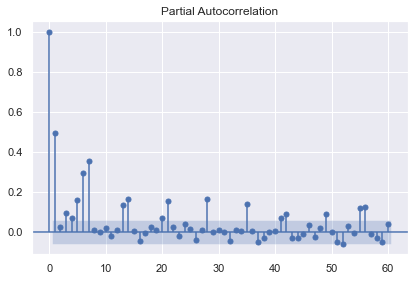

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_illi_efctv_diario.cantidad_pasos, lags = 6*10)
plt.show()

# Preprocesamiento

Realizaremos dos tareas:
- Verificar la existencia de datos faltantes (fecha o cantidad de pasos)
- Verificar outliers

En caso de existir alguno de los anteriores, vamos a usar la función interpolate().

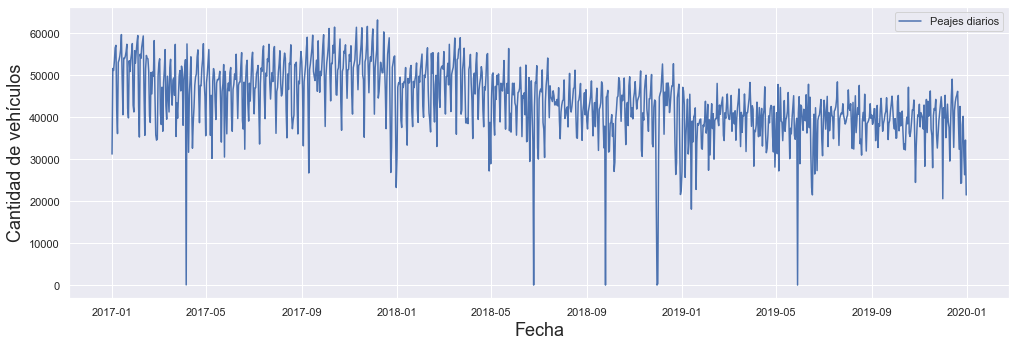

In [49]:
plt.figure(figsize = (15,5))
plt.plot(data_illi_efctv_diario.index, data_illi_efctv_diario.cantidad_pasos, label = 'Peajes diarios')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(2017,4,1), datetime.date(2017,4,9))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

In [51]:
mask_0= data_illi_efctv_diario[(data_illi_efctv_diario['cantidad_pasos']<=10000)]
mask_0

,hora_fin,cantidad_pasos,fecha_numeros,date_check
fecha,,,,
2017-04-06,3,40,736425,1.0
2018-06-25,0,0,736870,1.0
2018-09-25,0,0,736962,1.0
2018-11-30,0,0,737028,1.0
2018-12-01,92,350,737029,1.0
2019-05-29,0,0,737208,1.0


In [45]:
data_illi_efctv_diario['fecha_numeros']=data_illi_efctv_diario.index.map(datetime.datetime.toordinal)

In [46]:
data_illi_efctv_diario['date_check'] = data_illi_efctv_diario.fecha_numeros.diff()
data_illi_efctv_diario.date_check.value_counts()

1.0    1094
Name: date_check, dtype: int64

# **Tendencia, estacionalidad, outliers**

## Tendencia: media movil

In [ ]:
ventana = int(365)
tendencia_mm_365 = data_illi_efctv_diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
tendencia_mm_365

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(data_illi_efctv_diario.index, data_illi_efctv_diario.cantidad_pasos, label = 'Peajes diarios')
plt.plot(tendencia_mm_365, lw = 4, label = 'Peajes diarios - Rolling Window un año')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(2017,4,1), datetime.date(2017,4,9))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

In [ ]:
data_illi_efctv_diario.isnull().sum()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Tengo que revisar bien el dataset. Atención: **Sacar outliers: tengo que buscar los puntos aberrantes, tratar de explicarlos, y usar el interpolate, si es adecuado.**

Ahora voy a usar Prophet para desconponer la serie y hacer el forecast

In [ ]:
dataset['ds']= dataset['fecha']
dataset['y']= dataset['cantidad_pasos']

In [ ]:
mask1= dataset.drop(columns=['hora_fin', 'dia', 'estacion', 'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos', 'fecha'])

In [ ]:
m = Prophet()
m.fit(mask1)

In [ ]:
future= m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast= m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

# **Forecasting benchmark**

## El modelo lineal

## Evaluación

# **Forecasting con optimización de hiperparámetros**

## El modelo

## Evaluación

# Fuentes de información

- https://towardsdatascience.com/almost-everything-you-need-to-know-about-time-series-860241bdc578